In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [11]:
# Load Dataset
fram_data = pd.read_csv('datasets/logistic-regression/framingham.csv')
fram_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
fram_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Check for null values and impute them with corresponding modes or means**

In [13]:
# education
fram_data.education = fram_data.education.fillna(int(fram_data.education.mode()))

# cigsPerDay for currentSmoker == 1
fram_data.cigsPerDay = fram_data.cigsPerDay.fillna(fram_data[fram_data.currentSmoker == 1].cigsPerDay.mean())

# BPMeds
fram_data.BPMeds = fram_data.BPMeds.fillna(int(fram_data.BPMeds.mode()))

# totChol
fram_data.totChol = fram_data.totChol.fillna(int(fram_data.totChol.mean()))

# BMI
fram_data.BMI = fram_data.BMI.fillna(int(fram_data.BMI.mean()))

# Glucose
fram_data.glucose = fram_data.glucose.fillna(int(fram_data.glucose.mean()))

# heartrate
fram_data.heartRate = fram_data.heartRate.fillna(int(fram_data.heartRate.mean()))

fram_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
types = { 'male' : np.object, 'education' : np.object, 'currentSmoker' : np.object, 'BPMeds'  : np.object,
         'prevalentStroke' : np.object, 'prevalentHyp' : np.object, 'diabetes' : np.object, 
        'age' : np.int64, 'cigsPerDay' : np.int64, 'totChol' : np.int64, 'heartRate' : np.int64, 'glucose' : np.int64}
fram_data = fram_data.astype(types)
fram_data.head()
fram_data.dtypes

male                object
age                  int64
education           object
currentSmoker       object
cigsPerDay           int64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate            int64
glucose              int64
TenYearCHD           int64
dtype: object

## Build the model using Statmodels

In [15]:
import statsmodels.formula.api as sfa
import statsmodels.api as sa

### glm - Generalized Linear Model

In [16]:
fram_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [17]:
model = sfa.glm(formula = 'TenYearCHD~male+age+education+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose',
                data = fram_data, family = sa.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4222
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.7
Date:                Mon, 23 Mar 2020   Deviance:                       3207.4
Time:                        19:10:33   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.9912      0.659    -12.126      0.000      -9.283      -6.700
male[T.1]                0.4885      0.101      4.826      0.000       0.290       0.687
education[T.2.0]        -0.1928      0.115     -1.674      0.094      -0.419       0.033
education[T.3.0]        -0.0937      0.139     -0.675      0.500      -0.366       0.178
education[T.4.0]         0.0301      0.153      0.197      0.843      -0.269       0.329
currentSmoker[T.1]       0.0252      0.145      0.174      0.862      -0.259       0.310
BPMeds[T.1.0]            0.2512      0.220      1.139      0.255      -0.181       0.683
prevalentStroke[T.1]     0.9716      0.444      2.189      0.029       0.102       1.841
prevalentHyp[T.1]        0.2324      0.129      1.807      0.071      -0.020       0.485
diabetes[T.1]            0.1819      0.295      0.617      0.537      -0.396       0.760
age                      0.0606      0.006      9.637      0.000       0.048       0.073
cigsPerDay               0.0207      0.006      3.603      0.000       0.009       0.032
totChol                  0.0019      0.001      1.836      0.066      -0.000       0.004
sysBP                    0.0142      0.004      4.011      0.000       0.007       0.021
diaBP                   -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                      0.0013      0.012      0.107      0.915      -0.022       0.024
heartRate               -0.0012      0.004     -0.309      0.757      -0.009       0.006
glucose                  0.0067      0.002      3.142      0.002       0.003       0.011
========================================================================================
"""

In [18]:
result.null_deviance

3612.208700639955

In [19]:
result.aic

3243.439552166131

In [20]:
fram_data.education.value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [21]:
model_logit = sfa.logit(formula = 'TenYearCHD~male+age+education+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose', data = fram_data)
logit_result = model_logit.fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.378236
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           17
Date:                Mon, 23 Mar 2020   Pseudo R-squ.:                  0.1121
Time:                        19:10:35   Log-Likelihood:                -1603.7
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.866e-75
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.9912      0.659    -12.126      0.000      -9.283      -6.700
male[T.1]                0.4885      0.101      4.826      0.000       0.290       0.687
education[T.2.0]        -0.1928      0.115     -1.674      0.094      -0.419       0.033
education[T.3.0]        -0.0937      0.139     -0.675      0.500      -0.366       0.178
education[T.4.0]         0.0301      0.153      0.197      0.843      -0.269       0.329
currentSmoker[T.1]       0.0252      0.145      0.174      0.862      -0.259       0.310
BPMeds[T.1.0]            0.2512      0.220      1.139      0.255      -0.181       0.683
prevalentStroke[T.1]     0.9716      0.444      2.189      0.029       0.102       1.841
prevalentHyp[T.1]        0.2324      0.129      1.807      0.071      -0.020       0.485
diabetes[T.1]            0.1819      0.295      0.617      0.537      -0.396       0.760
age                      0.0606      0.006      9.637      0.000       0.048       0.073
cigsPerDay               0.0207      0.006      3.603      0.000       0.009       0.032
totChol                  0.0019      0.001      1.836      0.066      -0.000       0.004
sysBP                    0.0142      0.004      4.011      0.000       0.007       0.021
diaBP                   -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                      0.0013      0.012      0.107      0.915      -0.022       0.024
heartRate               -0.0012      0.004     -0.309      0.757      -0.009       0.006
glucose                  0.0067      0.002      3.142      0.002       0.003       0.011
========================================================================================
"""

In [22]:
result.pvalues.sort_values(ascending=False)

BMI                     9.145567e-01
currentSmoker[T.1]      8.622061e-01
education[T.4.0]        8.434732e-01
heartRate               7.573891e-01
diaBP                   6.229108e-01
diabetes[T.1]           5.369849e-01
education[T.3.0]        4.997722e-01
BPMeds[T.1.0]           2.545164e-01
education[T.2.0]        9.414388e-02
prevalentHyp[T.1]       7.079966e-02
totChol                 6.642351e-02
prevalentStroke[T.1]    2.858189e-02
glucose                 1.675325e-03
cigsPerDay              3.141725e-04
sysBP                   6.037163e-05
male[T.1]               1.393208e-06
age                     5.566154e-22
Intercept               7.654899e-34
dtype: float64

#### Drop `BMI` that has worst P Value

In [23]:
frame_data_1 = fram_data.drop(['BMI'], axis = 1)
frame_data_1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,85,85,0


In [24]:
model = sfa.glm(formula = 'TenYearCHD~male+age+education+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+heartRate+glucose',
                data = frame_data_1, family = sa.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4223
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.7
Date:                Mon, 23 Mar 2020   Deviance:                       3207.5
Time:                        19:10:37   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.9665      0.617    -12.905      0.000      -9.176      -6.757
male[T.1]                0.4888      0.101      4.832      0.000       0.291       0.687
education[T.2.0]        -0.1941      0.115     -1.695      0.090      -0.419       0.030
education[T.3.0]        -0.0953      0.138     -0.691      0.490      -0.366       0.175
education[T.4.0]         0.0287      0.152      0.189      0.850      -0.269       0.327
currentSmoker[T.1]       0.0233      0.144      0.162      0.871      -0.259       0.306
BPMeds[T.1.0]            0.2518      0.220      1.142      0.253      -0.180       0.684
prevalentStroke[T.1]     0.9717      0.444      2.190      0.029       0.102       1.841
prevalentHyp[T.1]        0.2334      0.128      1.818      0.069      -0.018       0.485
diabetes[T.1]            0.1837      0.294      0.624      0.532      -0.393       0.760
age                      0.0605      0.006      9.639      0.000       0.048       0.073
cigsPerDay               0.0207      0.006      3.609      0.000       0.009       0.032
totChol                  0.0019      0.001      1.839      0.066      -0.000       0.004
sysBP                    0.0142      0.004      4.010      0.000       0.007       0.021
diaBP                   -0.0028      0.006     -0.480      0.631      -0.014       0.009
heartRate               -0.0012      0.004     -0.308      0.758      -0.009       0.006
glucose                  0.0067      0.002      3.144      0.002       0.003       0.011
========================================================================================
"""

In [25]:
result.pvalues.sort_values(ascending=False)

currentSmoker[T.1]      8.714889e-01
education[T.4.0]        8.500615e-01
heartRate               7.580784e-01
diaBP                   6.310799e-01
diabetes[T.1]           5.323856e-01
education[T.3.0]        4.898747e-01
BPMeds[T.1.0]           2.532766e-01
education[T.2.0]        9.007928e-02
prevalentHyp[T.1]       6.903735e-02
totChol                 6.596770e-02
prevalentStroke[T.1]    2.853746e-02
glucose                 1.668793e-03
cigsPerDay              3.070198e-04
sysBP                   6.063983e-05
male[T.1]               1.351906e-06
age                     5.493797e-22
Intercept               4.209046e-38
dtype: float64

In [26]:
8.714889e-01

0.8714889

In [27]:
model_2 = sfa.glm(formula = 'TenYearCHD~male+age+education+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+heartRate+glucose',
                data = frame_data_1, family = sa.families.Binomial())
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4224
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.7
Date:                Mon, 23 Mar 2020   Deviance:                       3207.5
Time:                        19:10:39   Pearson chi2:                 4.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.9558      0.614    -12.962      0.000      -9.159      -6.753
male[T.1]                0.4885      0.101      4.829      0.000       0.290       0.687
education[T.2.0]        -0.1936      0.114     -1.691      0.091      -0.418       0.031
education[T.3.0]        -0.0955      0.138     -0.692      0.489      -0.366       0.175
education[T.4.0]         0.0289      0.152      0.190      0.849      -0.269       0.327
BPMeds[T.1.0]            0.2518      0.220      1.143      0.253      -0.180       0.684
prevalentStroke[T.1]     0.9709      0.444      2.188      0.029       0.101       1.840
prevalentHyp[T.1]        0.2331      0.128      1.816      0.069      -0.018       0.485
diabetes[T.1]            0.1828      0.294      0.621      0.534      -0.394       0.759
age                      0.0605      0.006      9.648      0.000       0.048       0.073
cigsPerDay               0.0214      0.004      5.483      0.000       0.014       0.029
totChol                  0.0019      0.001      1.836      0.066      -0.000       0.004
sysBP                    0.0142      0.004      4.011      0.000       0.007       0.021
diaBP                   -0.0029      0.006     -0.486      0.627      -0.014       0.009
heartRate               -0.0012      0.004     -0.304      0.761      -0.009       0.006
glucose                  0.0067      0.002      3.143      0.002       0.003       0.011
========================================================================================
"""

In [28]:
result_2.null_deviance

3612.208700639955

In [29]:
result.aic

3241.4510571469714

In [30]:
result_2.pvalues.sort_values(ascending=False)

education[T.4.0]        8.492402e-01
heartRate               7.608027e-01
diaBP                   6.267430e-01
diabetes[T.1]           5.343800e-01
education[T.3.0]        4.889681e-01
BPMeds[T.1.0]           2.530903e-01
education[T.2.0]        9.075336e-02
prevalentHyp[T.1]       6.932087e-02
totChol                 6.633819e-02
prevalentStroke[T.1]    2.863691e-02
glucose                 1.670645e-03
sysBP                   6.038272e-05
male[T.1]               1.369844e-06
cigsPerDay              4.172775e-08
age                     5.031915e-22
Intercept               2.009488e-38
dtype: float64

In [31]:
8.492402e-01

0.8492402

In [32]:
7.608027e-01

0.7608027

In [33]:
6.267430e-01

0.626743

In [34]:
5.343800e-01

0.53438

In [35]:
fram_data_3 = fram_data.drop(['BMI','education','currentSmoker'], axis = 1)

In [36]:
fram_data_3.columns

Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [37]:
model_3 = sfa.glm(formula = 'TenYearCHD~male+age+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+heartRate+glucose',
                data = fram_data_3, family = sa.families.Binomial())
result_3 = model_3.fit()
print(result_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4227
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.4
Date:                Mon, 23 Mar 2020   Deviance:                       3210.9
Time:                        19:10:48   Pearson chi2:                 4.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -8.0853 

In [38]:
result_3.pvalues.sort_values(ascending=False)

heartRate               7.161236e-01
diaBP                   6.322270e-01
diabetes[T.1]           4.946431e-01
BPMeds[T.1.0]           2.634309e-01
totChol                 7.460752e-02
prevalentHyp[T.1]       6.811118e-02
prevalentStroke[T.1]    2.824258e-02
glucose                 1.880819e-03
sysBP                   5.530913e-05
male[T.1]               3.482625e-07
cigsPerDay              5.562323e-08
age                     5.267220e-24
Intercept               6.323314e-41
dtype: float64

In [39]:
model_4 = sfa.glm(formula = 'TenYearCHD~male+age+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+diaBP+glucose',
                data = fram_data_3, family = sa.families.Binomial())
result_4 = model_4.fit()
print(result_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4228
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.5
Date:                Mon, 23 Mar 2020   Deviance:                       3211.0
Time:                        19:11:00   Pearson chi2:                 4.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -8.1709 

In [40]:
result_4.deviance

3211.01555682373

In [41]:
result_4.null_deviance

3612.208700639955

In [42]:
result_4.aic

3235.01555682373

In [43]:
result_4.pvalues.sort_values(ascending=False)

diaBP                   6.187779e-01
diabetes[T.1]           4.926887e-01
BPMeds[T.1.0]           2.568125e-01
totChol                 7.783151e-02
prevalentHyp[T.1]       7.060820e-02
prevalentStroke[T.1]    2.736099e-02
glucose                 1.997215e-03
sysBP                   5.845378e-05
male[T.1]               2.099953e-07
cigsPerDay              5.543005e-08
age                     3.141547e-24
Intercept               7.113616e-49
dtype: float64

In [44]:
model_5 = sfa.glm(formula = 'TenYearCHD~male+age+cigsPerDay+BPMeds+prevalentStroke+' + 
                'prevalentHyp+diabetes+totChol+sysBP+glucose',
                data = fram_data_3, family = sa.families.Binomial())
result_5 = model_5.fit()
print(result_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                            GLM   Df Residuals:                     4229
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.6
Date:                Mon, 23 Mar 2020   Deviance:                       3211.3
Time:                        19:11:11   Pearson chi2:                 4.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -8.2947 

In [45]:
result_5.aic

3233.26288128837

In [46]:
result_5.pvalues.sort_values(ascending=False)

diabetes[T.1]           4.847329e-01
BPMeds[T.1.0]           2.545426e-01
prevalentHyp[T.1]       7.976627e-02
totChol                 7.808652e-02
prevalentStroke[T.1]    2.756557e-02
glucose                 1.897388e-03
sysBP                   1.227974e-06
male[T.1]               2.324492e-07
cigsPerDay              4.687566e-08
age                     5.340428e-26
Intercept               2.663553e-62
dtype: float64

In [47]:
# currentSmoker[T.1]      8.714889e-01
# education[T.4.0]        8.500615e-01
# heartRate               7.580784e-01
# diaBP                   6.310799e-01
# diabetes[T.1]           5.323856e-01
fram_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [48]:
fram_data_final = fram_data.drop(['BMI', 'education', 'currentSmoker', 'heartRate', 'diaBP' ], axis = 1)

In [49]:
fram_data_final.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose,TenYearCHD
0,1,39,0,0,0,0,0,195,106.0,77,0
1,0,46,0,0,0,0,0,250,121.0,76,0
2,1,48,20,0,0,0,0,245,127.5,70,0
3,0,61,30,0,0,1,0,225,150.0,103,1
4,0,46,23,0,0,0,0,285,130.0,85,0


In [50]:
# importing moduels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [51]:
x = fram_data_final.drop('TenYearCHD', axis = 1)
y = fram_data_final.TenYearCHD
x.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
0,1,39,0,0,0,0,0,195,106.0,77
1,0,46,0,0,0,0,0,250,121.0,76
2,1,48,20,0,0,0,0,245,127.5,70
3,0,61,30,0,0,1,0,225,150.0,103
4,0,46,23,0,0,0,0,285,130.0,85


In [52]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [53]:
# Train Split
from sklearn.model_selection import train_test_split
# Lets use train_test_split to split X and y into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2968, 10) (1272, 10) (2968,) (1272,)


In [54]:
# fit the model on the train data
log_reg = LogisticRegression().fit(x_train, y_train)

# predict on train
train_preds = log_reg.predict(x_train)

# accuracy on train
print('Model Accuracy on Train: ', accuracy_score(y_train, train_preds))

# prediction on test
test_preds = log_reg.predict(x_test)
print('Model Accuracy on Test: ', accuracy_score(y_test, test_preds))


Model Accuracy on Train:  0.8500673854447439
Model Accuracy on Test:  0.8616352201257862


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# ROC
print('ROC Score on train: ', roc_auc_score(y_train, train_preds))
print('ROC Score on Test: ', roc_auc_score(y_test, test_preds))



ROC Score on train:  0.5286440375596518
ROC Score on Test:  0.5173777293921903


In [56]:
# Confusion Matrix
print('Confusion Matrix on Train:')
print(confusion_matrix(y_train, train_preds))

print('Confusion Matrix on  Test:')
print(confusion_matrix(y_test, test_preds))

Confusion Matrix on Train:
[[2495    7]
 [ 438   28]]
Confusion Matrix on  Test:
[[1089    5]
 [ 171    7]]


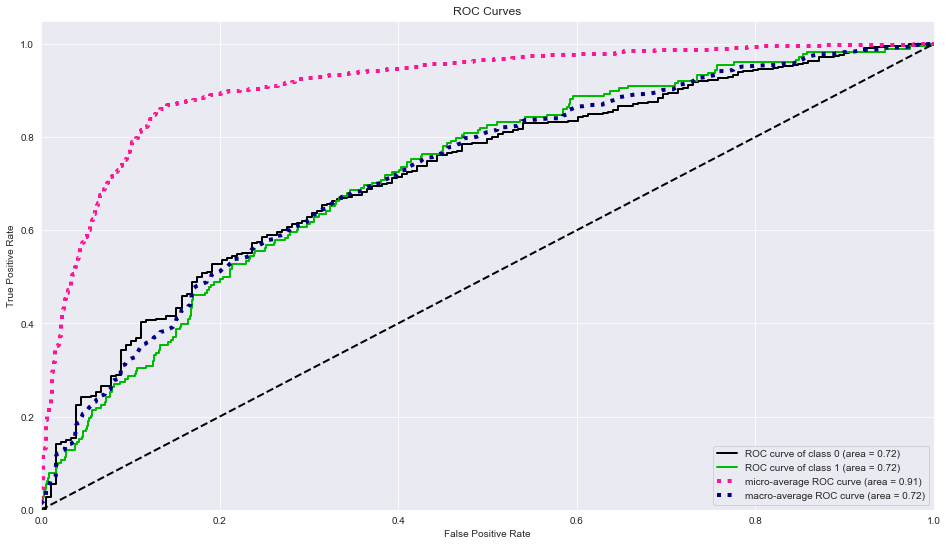

In [75]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, log_reg.predict_proba(x_test), figsize = (16,9))
plt.show()